# HW3 - Kernel methods and decision trees

## Task 1: Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel.

**<font color='purple'>(a) Please fill in the 2 gaps in the code.</font>**

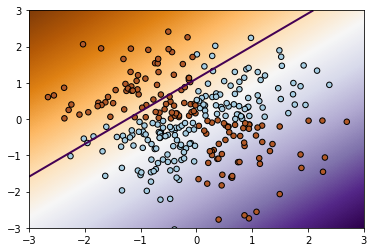

In [3]:
from sklearn import svm

# fit the model here:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_X,train_Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])
    
plot_svm(svm_model, train_X, train_Y)

- **(b)** Can SVM with linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>** No, SVM with linear kernal can not separate these data.


- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

In [4]:
from sklearn import svm
svm_model = svm.SVC(kernel='poly', degree=2)
svm_model.fit(train_X,train_Y)
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
plot_svm(svm_model, train_X, train_Y)

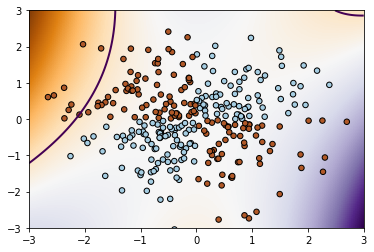

In [5]:
from sklearn import svm
svm_model = svm.SVC(kernel='poly', degree=3)
svm_model.fit(train_X,train_Y)
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
plot_svm(svm_model, train_X, train_Y)

**<font color='purple'>Answer to (c):</font>** SVM model with the polynomial kernel of degree 2 is reasonably better then degree 3.


- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

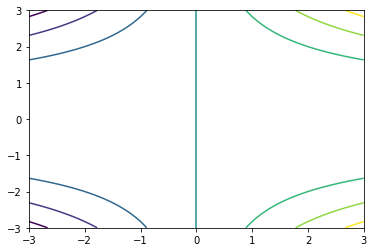

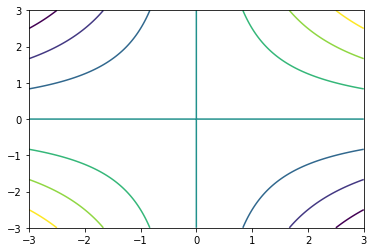

In [6]:
plt.contour(xx, yy, yy*yy*xx)
plt.show()
plt.contour(xx, yy, xx*yy)
plt.show()

**<font color='purple'>Answer to (d):</font>**
On the basis of visualize, I can guess $x_1 x_2$ is most useful. Because degree 2 is reasonably better then degree 3 and degree 1 is not using both features.

- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 48 of Lecture 05.

In [7]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

a,b,c,d=sp.symbols('x_1 x_2 z_1 z_2')
sp.expand((a*c+b*d)**2)

  2   2                     2   2
x₁ ⋅z₁  + 2⋅x₁⋅x₂⋅z₁⋅z₂ + x₂ ⋅z₂ 

- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x_1^2 , x_2^2, \sqrt{2} x_1 x_2)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**?

**<font color='purple'>Answer to (g):</font>**
Polynomial kernel with degree 2 performed well in subtask **(c)** for the reason that degree 2 is constructing better result then degree 1 and 3.

- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x_1^3, x_2^3, \sqrt{3} x_1^2 x_2 ,\sqrt{3} x_1 x_2^2)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>**
Polynomial kernel with degree 3 performed not well in subtask **(c)** for the reason kernal of degree 3 is not creating.

- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

**<font color='purple'>Answer to (j):</font>**
when r=1 and d=3

$(\mathbf{x}\cdot\mathbf{z}+1)^3$

$\phi(x)=(x_{1}^{3} + \sqrt{3} x_{1}^{2} x_{2} + \sqrt{3} x_{1}^{2} + \sqrt{3} x_{1} x_{2}^{2} + \sqrt{2}\sqrt{3} x_{1} x_{2} + \sqrt{3} x_{1} + x_{2}^{3} + \sqrt{3} x_{2}^{2} + \sqrt{3} x_{2} + 1)$
the necessary feature is present now.

- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Report the resulting plot.

**<font color='purple'>Answer to (k):</font>**
On the basis of visualize, it is reasonably better then without add coeff value 1 on the behalf of saperation.

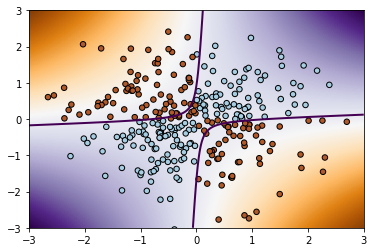

In [8]:
from sklearn import svm
svm_model = svm.SVC(kernel='poly', degree=2, coef0= 1)
svm_model.fit(train_X,train_Y)
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
plot_svm(svm_model, train_X, train_Y)

## Task 2: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

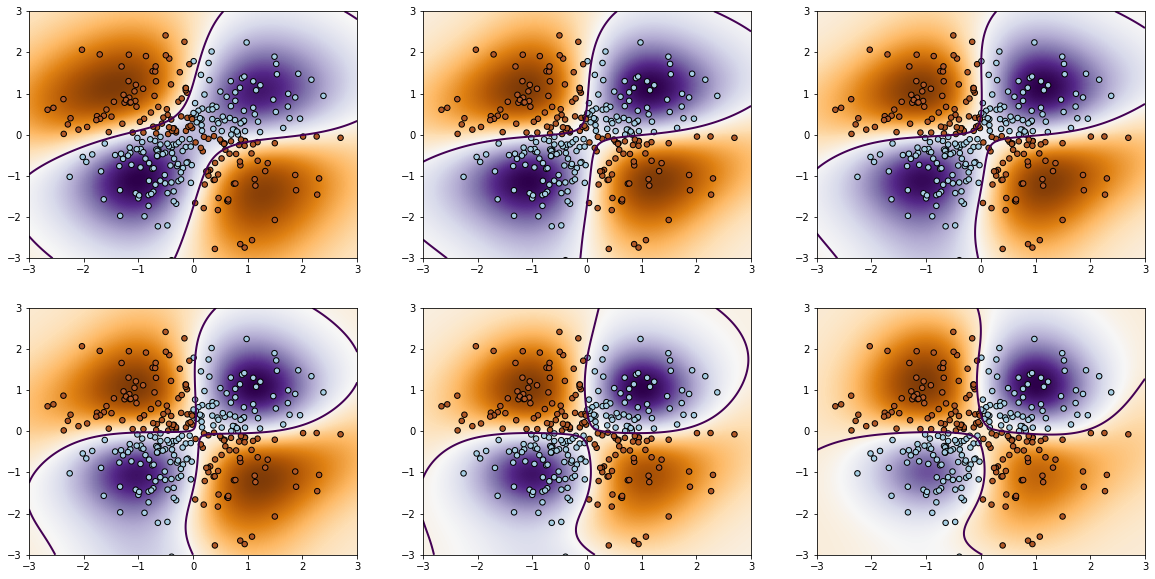

In [14]:
from sklearn import svm
fig,ax = plt.subplots(2, 3, figsize=(20,10))
C= [0.1, 0.5, 1, 2, 10, 100]
pointer=0
for i in range(2):
    for j in range(3):
        svm_model = svm.SVC(kernel='rbf', degree=2, C=C[pointer])
        svm_model.fit(train_X,train_Y)
        xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
        plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])
        pointer = pointer + 1
        
plt.show()

**<font color='purple'>Answer to (a):</font>**
C behaves as a regularization parameter in the SVM. The C parameter tells the SVM optimization how much we want to avoid misclassification. For large values of C like 100, the optimization will choose a smaller-margin hyperplane. Conversely, a very small value of C like 0.1 will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

In [15]:
from sklearn import svm
fig,ax = plt.subplots(2, 3, figsize=(20,10))
C= [0.01, 0.5, 1, 2, 10, 100]
pointer=0
for i in range(2):
    for j in range(3):
        svm_model = svm.SVC(kernel='rbf', degree=2, gamma=C[pointer])
        svm_model.fit(train_X,train_Y)
        xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
        plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])
        pointer = pointer + 1
        
plt.show()

**<font color='purple'>Answer to (b):</font>**
The gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function).In above figure, A small gamma value like(0.1 or 0.5) is representing with a large variance. A large gamma like (100) value is showing a small variance and in this case, two points are considered similar just if they are close to each other.

## Task 3: Decision tree learning (3 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the homework. The following code loads the dataset and prepares it for the task.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing

np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [18]:
data.head()

age          workclass  education       marital_status        occupation  \
7    52   Self-emp-not-inc          9   Married-civ-spouse   Exec-managerial   
8    31            Private         14        Never-married    Prof-specialty   
9    42            Private         13   Married-civ-spouse   Exec-managerial   
10   37            Private         10   Married-civ-spouse   Exec-managerial   
11   30          State-gov         13   Married-civ-spouse    Prof-specialty   

                   race      sex  hours_per_week income  
7                 White     Male              45   >50K  
8                 White   Female              50   >50K  
9                 White     Male              40   >50K  
10                Black     Male              80   >50K  
11   Asian-Pac-Islander     Male              40   >50K

The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [19]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

age  education  hours_per_week income  workclass_ Federal-gov  \
7    52          9              45   >50K                       0   
8    31         14              50   >50K                       0   
9    42         13              40   >50K                       0   
10   37         10              80   >50K                       0   
11   30         13              40   >50K                       0   

    workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
7                      0                        0                   0   
8                      0                        0                   1   
9                      0                        0                   1   
10                     0                        0                   1   
11                     0                        0                   0   

    workclass_ Self-emp-inc  workclass_ Self-emp-not-inc    ...      \
7                         0                            1    ...       
8                         0                            0    ...       
9                         0                            0    ...       
10                        0                            0    ...       
11                        0                            0    ...       

    occupation_ Sales  occupation_ Tech-support  occupation_ Transport-moving  \
7                   0                         0                             0   
8                   0                         0                             0   
9                   0                         0                             0   
10                  0                         0                             0   
11                  0                         0                             0   

    race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
7                          0                         0            0   
8                          0                         0            0   
9                          0                         0            0   
10                         0                         0            1   
11                         0                         1            0   

    race_ Other  race_ White  sex_ Female  sex_ Male  
7             0            1            0          1  
8             0            1            1          0  
9             0            1            0          1  
10            0            0            0          1  
11            0            0            0          1  

[5 rows x 40 columns]

We will consider the binary classification task of predicting income:

In [20]:
data.income.value_counts()

>50K     7508
<=50K    7508
Name: income, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

**<font color='purple'>Answer to (a):</font>**

In [22]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt = dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)
print ("test accuracy:",accuracy_score(y_test, test_pred))
print ("train accuracy:",accuracy_score(y_train, train_pred))

test accuracy: 0.7566595631326585
train accuracy: 0.7559936068193926


- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

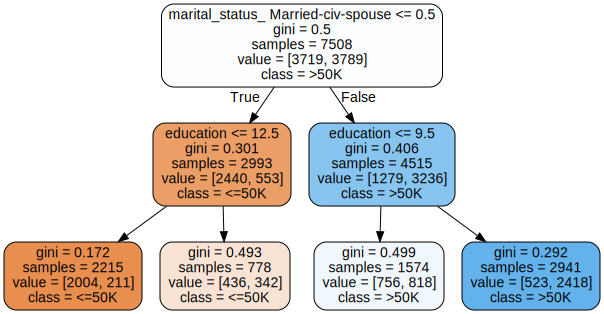

In [23]:
import graphviz
# here we assume that you have earlier defined a model 'dt = DecisionTreeClassifier(...)' and fitted it on training data
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X_train.columns,  
                                class_names=["<=50K", ">50K"],  
                                filled=True, rounded=True, 
                                special_characters=False) 
graph = graphviz.Source(dot_data)
graph

**<font color='purple'>Answer to (b):</font>**
Decision tree breaks down a dataset into smaller subsets with increase in depth of tree. The final result is a tree with decision nodes and leaf nodes. The tree is catagories on education basis "<=12.5" and"<=9.5K". A Gini score is giving an idea of how good a split is by how mixed the response classes are in the groups created by the split."Samples" is describing simply the number of observations contained in the node. Value shows the class distribution of the total samples 7508 for instance: value = [2440, 553] and value = [1279, 3236].

**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**
1.Binary features always has two contradict values.

2.categorical features are handled naturally in it. the decision tree is divided on categories and every category has a unique branch.

3.continuous features are divided into ranges to divide the tree.
While a variable can take any value between its minimum and maximum value, then it is called a continuous variable and feature called continuous features. This feature works on threshold According to above tree, a lot of things we deal with fall in this Like category: education.

- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [24]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)
print ("test accuracy:",accuracy_score(y_test, test_pred))
print ("train accuracy:",accuracy_score(y_train, train_pred))

test accuracy: 0.7334842834310069
train accuracy: 0.9790889717634523


**<font color='purple'>Answer to (d):</font>**
No, The model is not good. Because the accuracy is different and a huge difference between test and train accuracy.

1. criterion=’gini’ criterion measures the quality of a split.
2. splitter=’best’ The strategy used to choose the split at each node.
3. max_depth=None The maximum depth of the tree.
4. min_samples_split=2 The minimum number of samples required to split an internal node
5. min_samples_leaf=1 The minimum number of samples required to be at a leaf node.
6. min_weight_fraction_leaf=0.0 The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
7. max_features=None The number of features to consider when looking for the best split
8. random_state=None If int, random_state is the seed used by the random number generator
9. max_leaf_nodes=None Best nodes are defined as relative reduction in impurity.
10. min_impurity_decrease=0.0 A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
11. min_impurity_split=None Threshold for early stopping in tree growth.
12. class_weight=None Weights associated with classes in the form {class_label: weight}
13. presort=False Whether to presort the data to speed up the finding of best splits in fitting.

- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

In [56]:
dt = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=7, min_samples_split=9, min_samples_leaf=9, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
dt = dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)
print ("test accuracy:",accuracy_score(y_test, test_pred))
print ("train accuracy:",accuracy_score(y_train, train_pred))

test accuracy: 0.8002131060202451
train accuracy: 0.8191262653169952


**<font color='purple'>Answer to (e):</font>**
I experimented with these three parameters (max_depth, min_samples_split and min_samples_leaf) (5,8 and 7),(6,7 and 8) and the best value for these three parameteres are 7,9 and 9 respectively. "max_depth" can be used to improve the tree to adjust depth of tree(7). "min_samples_split". But "max_depth" is high then it cause "overfitted" and too low causes "underfitted". The minimum number of samples (9) required to split an internal node.The minimum number of samples(9) required to be at a leaf node.

- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [61]:
dt = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=7, min_samples_split=9, min_samples_leaf=9, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
dt = dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)
print ("test accuracy:",accuracy_score(y_test, test_pred))
print ("train accuracy:",accuracy_score(y_train, train_pred))
print(X_test.iloc[0], y_test.iloc[0])
print("Prediction for test:",test_pred[0])

test accuracy: 0.8002131060202451
train accuracy: 0.8191262653169952
age                                      58
education                                 9
hours_per_week                           16
workclass_ Federal-gov                    0
workclass_ Local-gov                      0
workclass_ Never-worked                   0
workclass_ Private                        0
workclass_ Self-emp-inc                   0
workclass_ Self-emp-not-inc               0
workclass_ State-gov                      1
workclass_ Without-pay                    0
marital_status_ Divorced                  0
marital_status_ Married-AF-spouse         0
marital_status_ Married-civ-spouse        0
marital_status_ Married-spouse-absent     0
marital_status_ Never-married             1
marital_status_ Separated                 0
marital_status_ Widowed                   0
occupation_ Adm-clerical                  1
occupation_ Armed-Forces                  0
occupation_ Craft-repair                  0
occupat

In [62]:
import graphviz
# here we assume that you have earlier defined a model 'dt = DecisionTreeClassifier(...)' and fitted it on training data
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X_train.columns,  
                                class_names=["<=50K", ">50K"],  
                                filled=True, rounded=True, 
                                special_characters=False) 
graph = graphviz.Source(dot_data)
graph

**<font color='purple'>Answer to (f):</font>**
marraige true: left

education < 12.5 : left

hours_per_week < : left

age < 32.5 : left

occupation >= 0.5 : right

sex_ Male 0 : left

age 58 : right

In [60]:
dt = tree.DecisionTreeClassifier(max_depth=7)
dt = dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)
print ("test accuracy:",accuracy_score(y_test, test_pred))
print ("train accuracy:",accuracy_score(y_train, train_pred))

test accuracy: 0.798614810868407
train accuracy: 0.8237879595098562


- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [57]:
dt.feature_importances_

array([1.07007437e-01, 2.38293370e-01, 5.14014887e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.07770596e-03, 0.00000000e+00,
       5.42131315e-03, 0.00000000e+00, 0.00000000e+00, 3.06471807e-04,
       0.00000000e+00, 5.51901933e-01, 0.00000000e+00, 1.38922660e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.00999711e-04, 1.18174859e-02, 4.05722571e-03, 3.82632509e-03,
       8.12697561e-05, 6.82620912e-03, 0.00000000e+00, 3.38178602e-03,
       7.92938331e-04, 3.45760358e-04, 6.03776568e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.70903196e-03, 0.00000000e+00,
       0.00000000e+00, 7.40164333e-03, 0.00000000e+00])

**<font color='purple'>Answer to (g):</font>**
"age", "education" and "working hours" seems to be most important feature. Yes, they agree with my guess.Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 30 minutes or 24 hours. The results are used to improve the homeworks next year.

**<font color='red'>Answer:</font>** 
I took around 16 hours.

<font color='red'>Please use <b>"Kernel->Restart and Run All"</b> command in Jupyter Notebook before submitting the homework and check your results. This ensures that we would be able to replicate your results while grading.</font>